<a href="https://colab.research.google.com/github/gmargonato/ML_Projects/blob/main/Iris_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AIDI 1006 - Assignment 4

**Context:** The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

**Task**: Predict the class of iris plant.

In [ ]:
#Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#read dataset from my google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Import iris dataset
df = pd.read_excel('/content/drive/MyDrive/Georgian College/AIDI 1006/Assignment_4/IRIS.xlsx')
df.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


## 1) EDA

In [ ]:
#General information regarding dataset and rows
print("Data shape (rows, columns):", df.shape)

print("\nData overral information:")
df.info()

print("\nData statistics on numeric fields:")
df.describe()

Data shape (rows, columns): (150, 5)

Data overral information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB

Data statistics on numeric fields:


,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


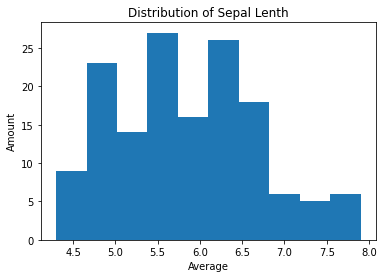

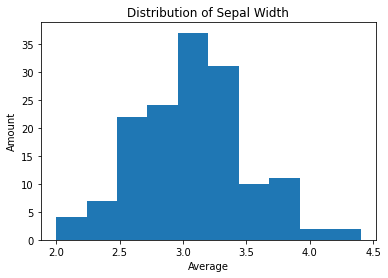

In [ ]:
#Histograms

#Sepal Length
plt.hist(df['sepal.length'])
plt.title('Distribution of Sepal Lenth')
plt.xlabel('Average')
plt.ylabel('Amount')
plt.show()

#Sepal Width
plt.hist(df['sepal.width'])
plt.title('Distribution of Sepal Width')
plt.xlabel('Average')
plt.ylabel('Amount')
plt.show()

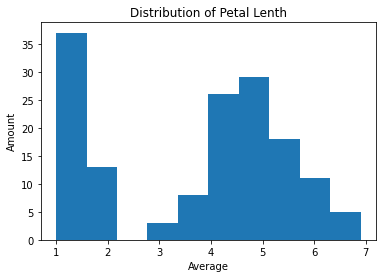

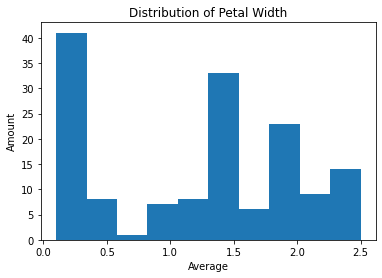

In [ ]:
#Petal Length
plt.hist(df['petal.length'])
plt.title('Distribution of Petal Lenth')
plt.xlabel('Average')
plt.ylabel('Amount')
plt.show()

#Petal Width
plt.hist(df['petal.width'])
plt.title('Distribution of Petal Width')
plt.xlabel('Average')
plt.ylabel('Amount')
plt.show()

## 2) Encode the target

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
variety_labels = df['variety'].unique()
encoder = LabelEncoder()
df['variety'] = encoder.fit_transform(df['variety'])
variety_encoded = encoder.transform(variety_labels)

In [ ]:
df.corr()['variety']

sepal.length    0.782561
sepal.width    -0.426658
petal.length    0.949035
petal.width     0.956547
variety         1.000000
Name: variety, dtype: float64

## 3) Train/Test/Validation Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop('variety', axis = 1)
y = df['variety']

60 - 20 - 20

In [ ]:
# Training
x_train, x_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.4, random_state=1)

# Validation and Test
x_val, x_test, y_val, y_test = train_test_split(x_val_test, y_val_test, test_size=0.5, random_state=1) 

print(x_train.shape[0], x_val.shape[0], x_test.shape[0])

90 30 30


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### a. KFold Cross Validation

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
k_fold = KFold(n_splits=15, shuffle = True, random_state = 42)

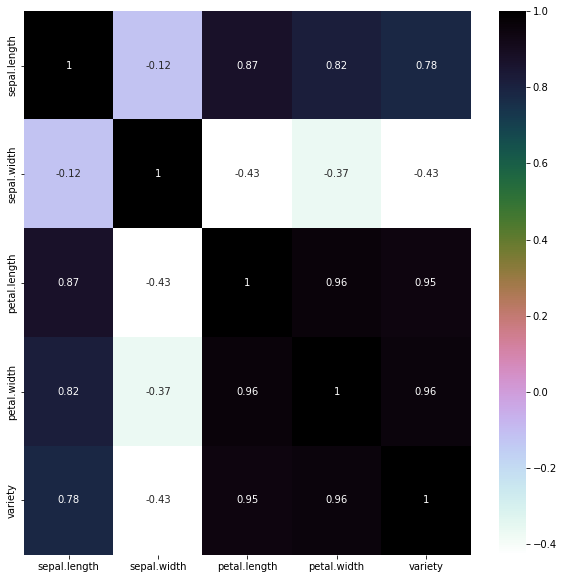

In [ ]:
plt.figure(figsize=(10,10)) 
sns.heatmap(df.corr(),annot=True,cmap='cubehelix_r')
plt.show()

### b. Grid Search to find optimal hyperparameters


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

In [ ]:
#SVM
svm_model = SVC(C=1, kernel='rbf')
svm_model.fit(x_train, y_train)

svm_y_pred = svm_model.predict(x_test)
print('Accuracy Score:', accuracy_score(y_test, svm_y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, svm_y_pred))
print('Classification Report:\n', classification_report(y_test, svm_y_pred))

Accuracy Score: 0.9666666666666667
Confusion Matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [ ]:
#Hyperparameter tuning
svm_param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],
                  'kernel': ['linear', 'rbf','poly'],
                  'gamma' :[0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}
svm_cv = KFold(n_splits=5)
svm_grid = GridSearchCV(SVC(), svm_param_grid, cv=svm_cv, scoring='accuracy')
svm_grid.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [ ]:
print('SVM best Params:', svm_grid.best_params_)
print('SVM best Score:', svm_grid.best_score_)

SVM best Params: {'C': 1, 'gamma': 0.0001, 'kernel': 'linear'}
SVM best Score: 0.9666666666666668


In [ ]:
svm_y_pred = svm_grid.predict(x_test)
print('Accuracy Score:', accuracy_score(y_test, svm_y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, svm_y_pred))
print('Classification Report:\n', classification_report(y_test, svm_y_pred))

Accuracy Score: 0.9666666666666667
Confusion Matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [ ]:
#Random Forest
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(x_train, y_train)

rf_y_pred = rf_model.predict(x_test)
print('Accuracy Score:', accuracy_score(y_test, rf_y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, rf_y_pred))
print('Classification Report:\n', classification_report(y_test, rf_y_pred))

Accuracy Score: 0.9666666666666667
Confusion Matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [ ]:
#Hyperparameter tuning
rf_param_grid = {'max_samples': [0.1, 0.2, 0.3, 0.4],
                'max_features': [1, 2],
                'n_estimators':[10, 50, 100],
                'max_depth': [8, 9, 10]
                }
rf_cv = KFold(n_splits=5)
rf_grid = GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=rf_cv)
rf_grid.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'max_depth': [8, 9, 10], 'max_features': [1, 2],
                         'max_samples': [0.1, 0.2, 0.3, 0.4],
                         'n_estimators': [10, 50, 100]})

In [ ]:
print('RF best Parameters:', rf_grid.best_estimator_)
print('RF best Score:', rf_grid.best_score_)

RF best Parameters: RandomForestClassifier(max_depth=8, max_features=2, max_samples=0.3,
                       n_estimators=50)
RF best Score: 0.9666666666666668


In [ ]:
rf_y_pred = rf_grid.predict(x_test)
print('Accuray:', accuracy_score(y_test, rf_y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, rf_y_pred))
print('Classification Report:\n', classification_report(y_test, rf_y_pred))


Accuray: 0.9666666666666667
Confusion Matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [ ]:
#Gradient Boosting
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)
gb_model.fit(x_train, y_train)

GradientBoostingClassifier()

In [ ]:
gb_y_pred = gb_model.predict(x_test)
print('Accuracy Score:', accuracy_score(y_test, gb_y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, gb_y_pred))
print('Classification Report:\n', classification_report(y_test, gb_y_pred))


Accuracy Score: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
#Hyperparameter tuning
gb_grid_param = {'learning_rate': [0.01, 0.05, 0.1, 1],
                 'n_estimators' : [10, 50, 100, 500, 1000],
                 'max_depth': [2, 5, 8, 11],
                 'max_features': [1,2]}
gb_cv = KFold(n_splits=5)
gb_grid = GridSearchCV(GradientBoostingClassifier(), gb_grid_param, cv=gb_cv)
gb_grid.fit(x_train, y_train)

print('GB best Parameters:', gb_grid.best_estimator_)
print('GB best Score:', gb_grid.best_score_)

GB best Parameters: GradientBoostingClassifier(max_depth=2, max_features=1, n_estimators=10)
GB best Score: 0.9444444444444443


In [ ]:
gb_y_pred = gb_grid.predict(x_test)
print('Accuray:', accuracy_score(y_test, gb_y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, gb_y_pred))
print('Classification Report:\n', classification_report(y_test, gb_y_pred))

Accuray: 0.9666666666666667
Confusion Matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

